In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811601 sha256=80515a806ab7168d4d133ba2dce6889f5ce88fd8430226461593f4b3987ac665
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from surprise import accuracy, SVD, NMF, SVDpp, Dataset
from surprise.model_selection import train_test_split, cross_validate


In [ ]:
data = Dataset.load_builtin(name = 'ml-100k', prompt=True)
data


Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
algorithms = [SVD(), SVDpp(), NMF()]

**SVD algorithm**

In [ ]:
SVD_result = cross_validate(algorithms[0], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVD_result = pd.DataFrame.from_dict(SVD_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9373  0.9337  0.9443  0.9251  0.9404  0.9362  0.0066  
MAE (testset)     0.7391  0.7347  0.7411  0.7300  0.7418  0.7373  0.0044  
Fit time          1.32    1.32    1.29    1.31    1.29    1.30    0.01    
Test time         0.12    0.17    0.12    0.20    0.17    0.16    0.03    


**SVDpp algorithm**

In [ ]:
SVDpp_result = cross_validate(algorithms[1], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVDpp_result = pd.DataFrame.from_dict(SVDpp_result).mean(axis=0)


Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9273  0.9229  0.9126  0.9249  0.9201  0.9216  0.0051  
MAE (testset)     0.7282  0.7224  0.7149  0.7250  0.7192  0.7219  0.0046  
Fit time          26.08   26.13   27.11   26.34   26.13   26.36   0.39    
Test time         5.30    4.62    5.33    4.43    5.33    5.00    0.39    


**NMF algorithm**

In [ ]:
NMF_result = cross_validate(algorithms[2], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
NMF_result = pd.DataFrame.from_dict(NMF_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9510  0.9697  0.9582  0.9615  0.9667  0.9614  0.0066  
MAE (testset)     0.7454  0.7627  0.7566  0.7551  0.7603  0.7560  0.0060  
Fit time          2.03    2.39    2.36    2.05    2.02    2.17    0.17    
Test time         0.10    0.19    0.10    0.11    0.11    0.12    0.04    


In [ ]:
algorithms_result = pd.DataFrame(columns=['SVD', 'SVDpp', 'NMF'])
algorithms_result['SVD'] = SVD_result
algorithms_result['SVDpp'] = SVDpp_result
algorithms_result['NMF'] = NMF_result
algorithms_result

,SVD,SVDpp,NMF
test_rmse,0.936166,0.921553,0.961395
test_mae,0.737344,0.721933,0.756013
fit_time,1.304691,26.356647,2.171370
test_time,0.155618,5.004678,0.122300


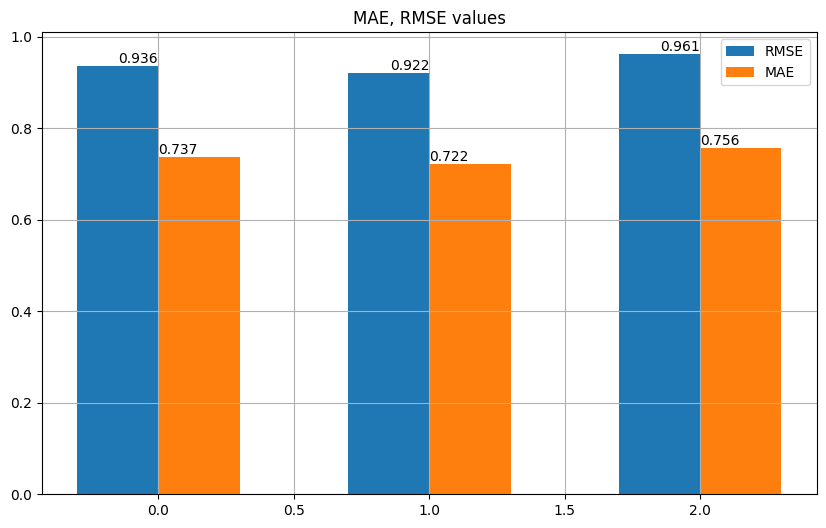

In [ ]:
import matplotlib.pyplot as plt
#algorithms_result.iloc[0]
plt.figure(figsize=(10, 6))
x = np.arange(len(algorithms_result.columns))
plt.bar(x-0.15, algorithms_result.iloc[0], width=0.3, label='RMSE')
plt.bar(x+0.15, algorithms_result.iloc[1], width=0.3, label='MAE')
for index, value in enumerate(algorithms_result.iloc[0]):
  plt.text(index, value, str(round(value, 3)), ha='right', va='bottom')
for index, value in enumerate(algorithms_result.iloc[1]):
  plt.text(index, value, str(round(value, 3)), ha='left', va='bottom')
plt.grid()
plt.legend()
plt.title('MAE, RMSE values')
plt.show()

**Train Data**

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.25)

svd_train = algorithms[0].fit(train_data)
svdpp_train = algorithms[1].fit(train_data)
nmf_train = algorithms[2].fit(train_data)

In [ ]:
svd_predict = svd_train.test(test_data)
svdpp_predict = svdpp_train.test(test_data)
nmf_predict = nmf_train.test(test_data)

In [ ]:
svd_rmse = accuracy.rmse(svd_predict)
svdpp_rmse = accuracy.rmse(svdpp_predict)
nmf_rmse = accuracy.rmse(nmf_predict)
print(f'SVD RMSE: {svd_rmse}')
print(f'SVDpp RMSE: {svdpp_rmse}')
print(f'NMF RMSE: {nmf_rmse}')

RMSE: 0.9359
RMSE: 0.9213
RMSE: 0.9616
SVD RMSE: 0.9358608247195119
SVDpp RMSE: 0.9212524197477157
NMF RMSE: 0.9615558628096598


Як можна побачити з отриманих результатів  алгоритм **NMF** показує кращу ефективність порівняно з **SVD** і **SVDpp** з бібліотеки surprise для даного датасету movielens